# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries Imported')


Libraries Imported


# Importing Dataset

In [2]:
column_names=['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df=pd.read_csv('data.csv',names=column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


# Check for missing-data

In [3]:
df.isna().sum()
#sum() method calculates the number of null values that are found by the isna() method

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Data Normalization 

In [4]:
df=df.iloc[:,1:]
df_norm=(df-df.mean())/df.std()
#normalization helps us to bring all the samples in the same range

df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


# Training and Testing sets

In [5]:
#selecting features
x=df_norm.iloc[:,:6]
print('features :-')
print(x.head())
print()


#selecting labels
y=df_norm.iloc[:,6:]
print('label :-')
print(y.head())
print()

#feature and label values
x_arr=x.values
y_arr=y.values
print('Features array shape:',x_arr.shape)
print('Label array shape:',y_arr.shape)


features :-
       date       age  distance    stores  latitude  longitude
0  0.015978  0.181384  1.257002  0.345224 -0.307212  -1.260799
1 -0.350485 -1.319118 -0.930610 -0.609312  0.325301  -1.260799
2  1.298598 -0.083410 -0.618094  0.663402  1.590328  -1.576456
3 -1.266643 -0.524735 -0.930610 -0.927491 -1.572238   0.948803
4  0.932135  0.534444  0.006938  0.981581 -1.255981  -0.945141

label :-
      price
0  0.350088
1 -1.836486
2 -0.339584
3 -1.839425
4  0.245266

Features array shape: (5000, 6)
Label array shape: (5000, 1)


# Train/Test split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.5, random_state=0)
#creating a training/testing set helps the model to learn from one part of dataset and make predictions on the other part 
#the predictions are therefore unbiased

print('Training Set:', x_train.shape, y_train.shape)
print('Testing Set:', x_test.shape, y_test.shape)

Training Set: (2500, 6) (2500, 1)
Testing Set: (2500, 6) (2500, 1)


# Creating Model

In [7]:
#below is the architecture of our Neural Network: Sequential-type model from Keras. 
#it has 10 neurons in the input layer followed by a dense layer of 20 neurons and then again 5 neurons and at last the output layer having a single neuron.
#we are using ‘relu’ as the activation function for all our layers.
def get_model():
    model = Sequential([
        Dense(10, input_shape=(6,), activation='relu'),
        Dense(20, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse',metrics=['mse'])
    return model

get_model().summary()
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Model Training

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 420us/sample - loss: 0.8421 - mse: 0.8421 - val_loss: 0.5567 - val_mse: 0.5567
Epoch 2/100
2500/2500 [==============================] - 0s 153us/sample - loss: 0.3967 - mse: 0.3967 - val_loss: 0.2861 - val_mse: 0.2861
Epoch 3/100
2500/2500 [==============================] - 0s 96us/sample - loss: 0.2436 - mse: 0.2436 - val_loss: 0.2126 - val_mse: 0.2126
Epoch 4/100
2500/2500 [==============================] - 0s 101us/sample - loss: 0.1968 - mse: 0.1968 - val_loss: 0.1878 - val_mse: 0.1878
Epoch 5/100
2500/2500 [==============================] - 0s 94us/sample - loss: 0.1801 - mse: 0.1801 - val_loss: 0.1788 - val_mse: 0.1788
Epoch 6/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.1721 - mse: 0.1721 - val_loss: 0.1723 - val_mse: 0.1723
Epoch 7/100
2500/2500 [==============================] - 0s 117us/sample - loss: 0.1677 - mse: 0.1676 - val_loss: 0.1700

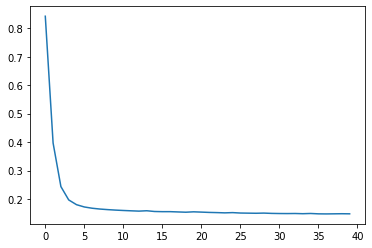

In [8]:
#Keras supports the early stopping of training via a callback called EarlyStopping.
#It keeps track of the accuracy values of the model and when the accuracy for the last n epochs isn’t changing, it automatically stops the training. 
es_cb = EarlyStopping(monitor='val_loss', patience=5)

model=get_model()
preds_on_untrained = model.predict(x_test)

history=model.fit(
    x_train, y_train, validation_data = (x_test, y_test), 
    epochs=100, callbacks=[es_cb]
    )

#a line plot of the mean_squared_error over the training epochs is created
plt.plot(history.history['mse'])

# Plot : Training and Validation Loss

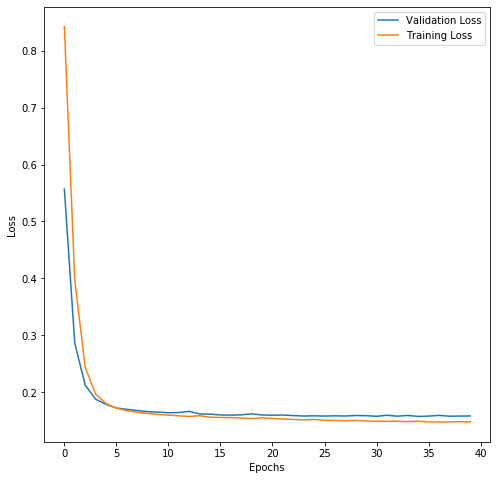

In [9]:
#a graph plotted between Validation and Training loss
def plot_loss(history):
    h=history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)


# Plot price predictions

In [10]:
#converting the normalized-price features back to price
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

#plotting a graph between trained and untrained values
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
price_test = [convert_label_value(y) for y in y_test]

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(price_untrained, price_trained, price_test)

NameError: name 'preds_on_trained' is not defined